In [1]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics', 'sci.space']
data_train = fetch_20newsgroups(subset='train', categories=categories, random_state=42)
data_test = fetch_20newsgroups(subset='test', categories=categories, random_state=42)

In [8]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
def is_letter_only(word):
    return word.isalpha()
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

def clean_text(docs):
    docs_cleaned = []
    for doc in docs:
        doc = doc.lower()
        doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if is_letter_only(word) and word not in all_names)
        docs_cleaned.append(doc_cleaned)
    return docs_cleaned

In [3]:
cleaned_train = clean_text(data_train.data)
label_train = data_train.target
cleaned_test = clean_text(data_test.data)
label_test = data_test.target
len(label_train), len(label_test)

(1177, 783)

In [4]:
from collections import Counter
print(Counter(label_train))
print(Counter(label_test))

Counter({1: 593, 0: 584})
Counter({1: 394, 0: 389})


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=None)
term_docs_train = tfidf_vectorizer.fit_transform(cleaned_train)
term_docs_test = tfidf_vectorizer.transform(cleaned_test)

In [10]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=42)

In [11]:
svm.fit(term_docs_train, label_train)

SVC(kernel='linear', random_state=42)

In [12]:
accuracy = svm.score(term_docs_test, label_test)
print('The accuracy of binary classification is: {0:.1f}%'.format(accuracy*100))

The accuracy of binary classification is: 96.7%


In [14]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500)
data_tsne = tsne_model.fit_transform(term_docs_train)

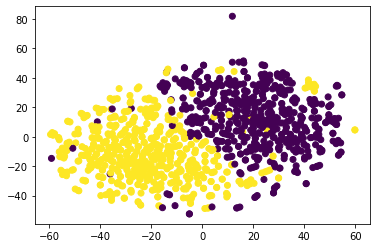

In [17]:
import matplotlib.pyplot as plt
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=data_train.target)
plt.show()

In [24]:
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
    'rec.sport.hockey'
]
data_train = fetch_20newsgroups(subset='train', categories=categories, random_state=42)
data_test = fetch_20newsgroups(subset='test', categories=categories, random_state=42)

cleaned_train = clean_text(data_train.data)
label_train = data_train.target
cleaned_test = clean_text(data_test.data)
label_test = data_test.target

print(len(cleaned_train), len(label_train), len(cleaned_test), len(label_test))

term_docs_train = tfidf_vectorizer.fit_transform(cleaned_train)
term_docs_test = tfidf_vectorizer.transform(cleaned_test)

2634 2634 1752 1752


In [25]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(term_docs_train, label_train)
accuracy = svm.score(term_docs_test, label_test)
print('The accuracy of 5-class classification is:{0:.1f}%'.format(accuracy * 100))

The accuracy of 5-class classification is:88.5%


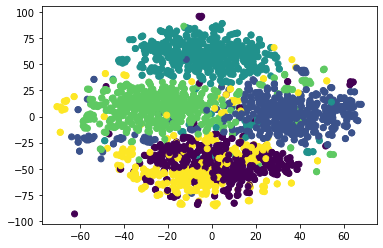

In [26]:
tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500)
data_tsne = tsne_model.fit_transform(term_docs_train)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=data_train.target)
plt.show()

In [27]:
from sklearn.metrics import classification_report
prediction = svm.predict(term_docs_test)
report = classification_report(label_test, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       319
           1       0.91      0.95      0.93       389
           2       0.98      0.96      0.97       399
           3       0.92      0.94      0.93       394
           4       0.73      0.73      0.73       251

    accuracy                           0.88      1752
   macro avg       0.87      0.87      0.87      1752
weighted avg       0.88      0.88      0.88      1752



In [29]:
import numpy as np
import matplotlib.pyplot as plt

X = np.c_[(.3, -.8), (-1.5, -1), (-1.3, -.8), (-1.1, -1.3), (-1.2, -.3), (-1.3, -.5), (-.6, 1.1), (-1.4, 2.2), (1, 1), (1.3, .8), (1.2, .5), (.2, -2), (.5, -2.4), (.2, -2.3), (0, -2.7), (1.3,  2.1)].T
Y = [-1] * 8 + [1] * 8

In [30]:
gamma_option = [1, 2, 4]

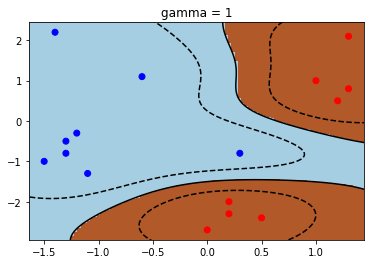

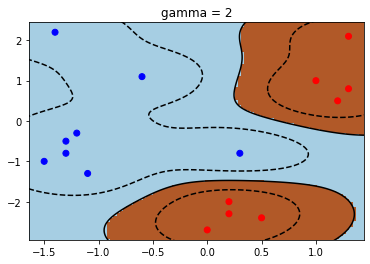

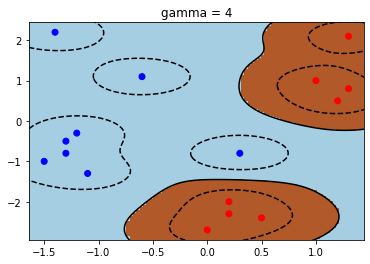

In [32]:
for i, gamma in enumerate(gamma_option, 1):
    svm = SVC(kernel='rbf', gamma=gamma)
    svm.fit(X, Y)
    plt.scatter(X[:, 0], X[:, 1], c=['b']*8+['r']*8, zorder=10, cmap=plt.cm.Paired)
    plt.axis('tight')
    XX, YY = np.mgrid[-3:3:200j, -3:3:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.title('gamma = %d' % gamma)
    plt.show()

In [33]:
categories = None
data_train = fetch_20newsgroups(subset='train', categories=categories, random_state=42)
data_test = fetch_20newsgroups(subset='test', categories=categories, random_state=42)
cleaned_train = clean_text(data_train.data)
label_train = data_train.target
cleaned_test = clean_text(data_test.data)
label_test = data_test.target

term_docs_train = tfidf_vectorizer.fit_transform(cleaned_train)
term_docs_test = tfidf_vectorizer.transform(cleaned_test)

In [34]:
svc_libsvm = SVC(kernel='linear')

In [35]:
parameters = {'C': (0.1, 1, 10, 100)}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(svc_libsvm, parameters, n_jobs=-1, cv=5)

import timeit
start_time = timeit.default_timer()
grid_search.fit(term_docs_train, label_train)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))

--- 224.255s seconds ---


In [36]:
grid_search.best_params_

{'C': 10}

In [37]:
grid_search.best_score_

0.8906670292441394

In [38]:
svc_libsvm_best = grid_search.best_estimator_
accuracy = svc_libsvm_best.score(term_docs_test, label_test)
print('The accuracy of 20-class classification is: {0:.1f}%'.format(accuracy * 100))

The accuracy of 20-class classification is: 78.7%


In [40]:
from sklearn.svm import LinearSVC
svc_linear = LinearSVC()
grid_search = GridSearchCV(svc_linear, parameters, n_jobs=-1, cv=5)
start_time = timeit.default_timer()
grid_search.fit(term_docs_train, label_train)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))

--- 15.892s seconds ---


In [41]:
grid_search.best_params_

{'C': 1}

In [42]:
grid_search.best_score_

0.8961467938657204

In [44]:
svc_linear_best = grid_search.best_estimator_
accuracy = svc_linear_best.score(term_docs_test, label_test)
print('The accuracy of 20-class classification is: {0:.1f}%'.format(accuracy * 100))

The accuracy of 20-class classification is: 80.0%


In [45]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('svc', LinearSVC())    
])

In [46]:
parameters_pipeline = {
    'tfidf__max_df': (0.25, 0.5, 1.0),
    'tfidf__max_features': (10000, None),
    'tfidf__sublinear_tf': (True, False),
    'tfidf__smooth_idf': (True, False),
    'svc__C': (0.3, 1, 3)
}

In [47]:
grid_search = GridSearchCV(pipeline, parameters_pipeline, n_jobs=-1, cv=5)
start_time = timeit.default_timer()
grid_search.fit(cleaned_train, label_train)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))

--- 132.927s seconds ---


In [48]:
grid_search.best_params_

{'svc__C': 1,
 'tfidf__max_df': 0.5,
 'tfidf__max_features': None,
 'tfidf__smooth_idf': False,
 'tfidf__sublinear_tf': True}

In [49]:
grid_search.best_score_

0.9035709973967094

In [50]:
pipeline_best = grid_search.best_estimator_
accuracy = pipeline_best.score(cleaned_test, label_test)
print('The accuracy of 20-class classification is: {0:.1f}%'.format(accuracy * 100))

The accuracy of 20-class classification is: 81.1%


In [51]:
import pandas as pd
df = pd.read_excel('CTG.xls', 'Raw Data')

In [56]:
X = df.iloc[1:2126, 3:-2].values
Y = df.iloc[1:2126, -1].values
Counter(Y)

Counter({2.0: 295, 1.0: 1654, 3.0: 176})

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [60]:
svc = SVC(kernel='rbf')
parameters = {'C': (100, 1e3, 1e4, 1e5),
              'gamma': (1e-8, 1e-7, 1e-6, 1e-5)}
grid_search = GridSearchCV(svc, parameters, n_jobs=-1, cv=5)
start_time = timeit.default_timer()
grid_search.fit(X_train, Y_train)
print('--- %0.3fs seconds ---' % (timeit.default_timer() - start_time))

--- 4.888s seconds ---


In [61]:
grid_search.best_params_

{'C': 100000.0, 'gamma': 1e-07}

In [62]:
grid_search.best_score_

0.9541176470588235

In [63]:
svc_best = grid_search.best_estimator_
accuracy = svc_best.score(X_test, Y_test)
print('The accuracy on testing set is {0:.1f}%'.format(accuracy * 100))

The accuracy on testing set is 95.5%


In [64]:
prediction = svc_best.predict(X_test)
report = classification_report(Y_test, prediction)
print(report)

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       324
         2.0       0.89      0.91      0.90        65
         3.0       1.00      0.78      0.88        36

    accuracy                           0.96       425
   macro avg       0.95      0.89      0.92       425
weighted avg       0.96      0.96      0.95       425



In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import timeit

categories = None
data_train = fetch_20newsgroups(subset='train', categories=categories, random_state=42)
data_test = fetch_20newsgroups(subset='test', categories=categories, random_state=42)
cleaned_train = clean_text(data_train.data)
label_train = data_train.target
cleaned_test = clean_text(data_test.data)
label_test = data_test.target

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=None)
term_docs_train = tfidf_vectorizer.fit_transform(cleaned_train)
term_docs_test = tfidf_vectorizer.transform(cleaned_test)

svc = SVC(kernel='rbf')
parameters = {'C': (100, 1e3, 1e4, 1e5),
              'gamma': (1e-8, 1e-7, 1e-6, 1e-5)}

grid_search = GridSearchCV(svc, parameters, n_jobs=-1, cv=5)
start_time = timeit.default_timer()
grid_search.fit(term_docs_train, label_train)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))

--- 814.203s seconds ---


In [13]:
grid_search.best_score_

0.8889874906864865

In [14]:
grid_search.best_params_

{'C': 100000.0, 'gamma': 1e-05}

In [15]:
svc_rbf_best = grid_search.best_estimator_
accuracy = svc_rbf_best.score(term_docs_test, label_test)
print('The accuracy of 20-class classification is: {0:.1f}%'.format(accuracy * 100))

The accuracy of 20-class classification is: 78.7%


In [16]:
from sklearn.naive_bayes import MultinomialNB

parameters = {'alpha': (0, 1, 2, 4),
              'fit_prior': (True, False)}

grid_search_nb = GridSearchCV(MultinomialNB(), parameters, n_jobs=-1, cv=5)
start_time = timeit.default_timer()
grid_search_nb.fit(term_docs_train, label_train)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))

--- 1.960s seconds ---


In [19]:
print(grid_search_nb.best_score_, grid_search_nb.best_params_)

0.8583174608011946 {'alpha': 1, 'fit_prior': False}


In [20]:
nb_best = grid_search_nb.best_estimator_
accuracy = nb_best.score(term_docs_test, label_test)
print('The accuracy of 20-class classification is: {0:.1f}%'.format(accuracy * 100))

The accuracy of 20-class classification is: 78.5%
